# Working on a Digit Dataset
## 

## Import necessary libraries and load digit dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn import tree

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score

from sklearn.datasets import load_digits
digits = load_digits()

### Type of the dataset

In [2]:
type(digits)

sklearn.utils.Bunch

### Keys

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### Description of understand dataset better

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Total number of features

In [5]:
len(digits.feature_names)

64

### Feature names (Independent Variables)

In [6]:
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


### Feature column data (Independent Variables)

In [7]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### Shape of dataset

In [8]:
digits.data.shape

(1797, 64)

### Target names (Dependent variable)

In [9]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Target values (Dependent variable)

In [10]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

### Image column (8 * 8 of all 64 features)

In [11]:
digits.images.shape

(1797, 8, 8)

In [12]:
len(digits.images)

1797

### Check 8 * 8 data

In [13]:
digits.images[:2]

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

## Let's get the image using 8 * 8 image column

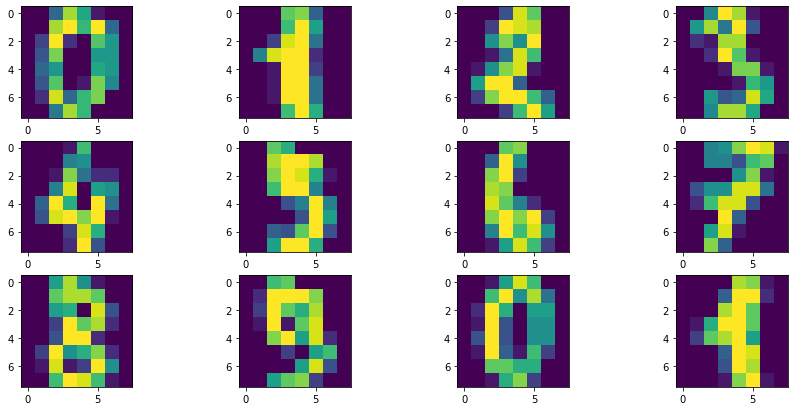

In [14]:
fig,axes = plt.subplots(3,4,figsize=(15,7))

for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i])
    

## Create a dataframe with all features

In [15]:
df = pd.DataFrame(digits.data,columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## Add our target column to dataframe

In [16]:
df['target'] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Check for null data

In [17]:
df.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64

### How many rows we have for each target value.?

In [18]:
df['target'].value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

### Check for target value 1

In [19]:
df[df['target']==1]['pixel_0_0']

1       0.0
11      0.0
21      0.0
42      0.0
47      0.0
       ... 
1752    0.0
1757    0.0
1760    0.0
1766    0.0
1774    0.0
Name: pixel_0_0, Length: 182, dtype: float64

# 

## Let's divide data with X (Independent variables) Y (Dependent variable)

In [20]:
X = digits.data
Y = digits.target

In [21]:
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


## 
## Split data into train & test sets

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

### Shape of new datasets

In [23]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


# 
# Model training

## SVC Linear

In [24]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train,Y_train)
Y_predict_linear = svc_linear.predict(X_test)

### SVC Polynomial

In [25]:
svc_poly = SVC(kernel='poly', degree=8)
svc_poly.fit(X_train, Y_train)
Y_predict_poly = svc_poly.predict(X_test)

## SVC Gaussian rbf 

In [26]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, Y_train)
Y_predict_rbf = svc_rbf.predict(X_test)

## Decision Tree

In [27]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train,Y_train)
Y_predict_dtree = dtree.predict(X_test)

## 
## Predict data with trained models

In [28]:
dt = {'Values':['Value1','Value2','Value3','Value4','Value5','Value6','Value7'],
      'Actual':Y_test[:7],
     'Linear':Y_predict_linear[:7],
     'Polynomial':Y_predict_poly[:7],
     'Gaussian RBF':Y_predict_rbf[:7],
     'Decision Tree':Y_predict_dtree[:7]}
pred_test = pd.DataFrame(dt)
pred_test

,Values,Actual,Linear,Polynomial,Gaussian RBF,Decision Tree
0,Value1,6,6,6,6,6
1,Value2,6,6,6,6,6
2,Value3,5,5,5,5,2
3,Value4,1,1,1,1,1
4,Value5,5,5,5,5,5
5,Value6,2,2,2,2,2
6,Value7,6,6,6,6,6


### By looking at the comparison, we can find that all models are moslty giving the same result
### 

## Let's take a look at the images with actual and predicted values

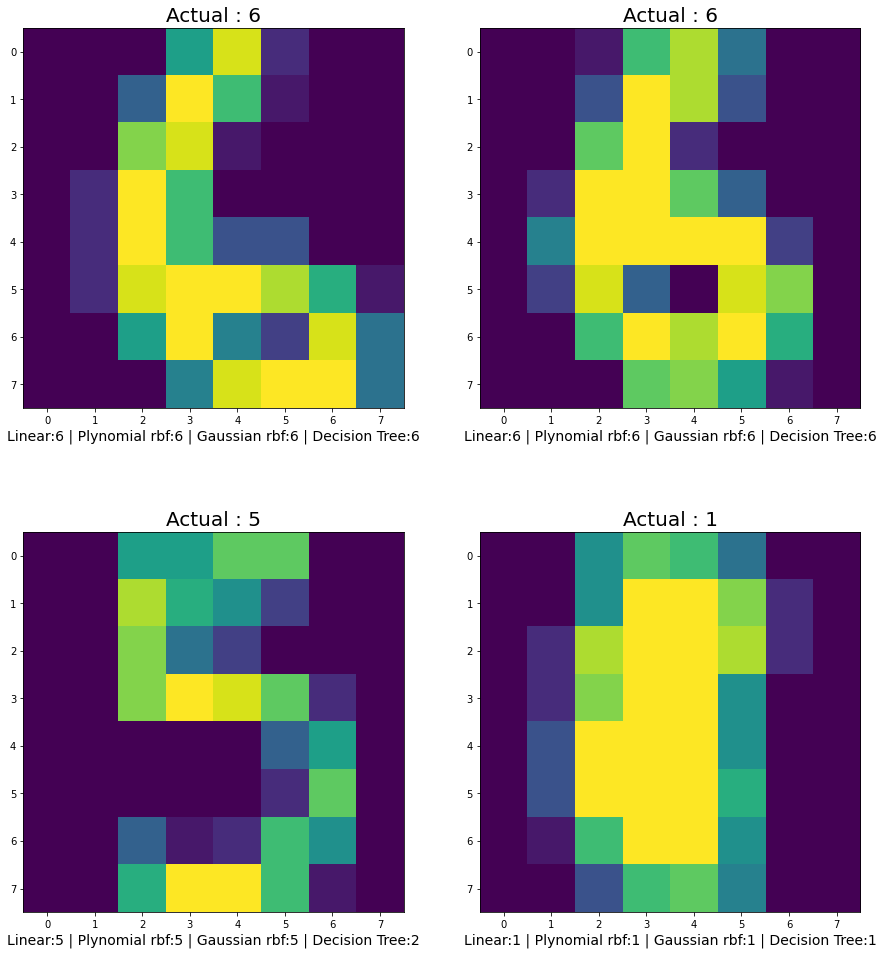

In [29]:
fig,axes = plt.subplots(2,2,figsize=(15,17))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[i].reshape(8,8))
    ax.set_title("Actual : "+str(Y_test[i]),size='20')
    ax.set_xlabel("Linear:"+str(Y_predict_linear[i])
                  +" | Plynomial rbf:"+str(Y_predict_poly[i])
                  +" | Gaussian rbf:"+str(Y_predict_rbf[i])
                  +" | Decision Tree:"+str(Y_predict_dtree[i]),size='14')

# 
# Matrix Evaluation

In [30]:
matrix_evaluation = pd.DataFrame({'Algorithm' :['SVC Linear','SVC Polynomial','SVC Gaussian RBF','Decision Tree'],
                                'MAE': [mean_absolute_error(Y_test,Y_predict_linear),
                                        mean_absolute_error(Y_test,Y_predict_poly),
                                        mean_absolute_error(Y_test,Y_predict_rbf),
                                        mean_absolute_error(Y_test,Y_predict_dtree),
                                       ], 
                                'MSE': [mean_squared_error(Y_test,Y_predict_linear),
                                        mean_squared_error(Y_test,Y_predict_poly),
                                        mean_squared_error(Y_test,Y_predict_rbf),
                                        mean_squared_error(Y_test,Y_predict_dtree)],
                                'RMSE': [np.sqrt(mean_squared_error(Y_test,Y_predict_linear)),
                                         np.sqrt(mean_squared_error(Y_test,Y_predict_poly)),
                                         np.sqrt(mean_squared_error(Y_test,Y_predict_rbf)),
                                         np.sqrt(mean_squared_error(Y_test,Y_predict_dtree))],
                                    'R2_score': [r2_score(Y_test,Y_predict_linear), 
                                                 r2_score(Y_test,Y_predict_poly),
                                                 r2_score(Y_test,Y_predict_rbf),          
                                                 r2_score(Y_test,Y_predict_dtree)],
                                 'Accuracy Score': [accuracy_score(Y_test,Y_predict_linear),
                                                    accuracy_score(Y_test,Y_predict_poly),
                                                   accuracy_score(Y_test,Y_predict_rbf),
                                                   accuracy_score(Y_test,Y_predict_dtree)] })


matrix_evaluation

,Algorithm,MAE,MSE,RMSE,R2_score,Accuracy Score
0,SVC Linear,0.144444,0.772222,0.878762,0.901632,0.966667
1,SVC Polynomial,0.116667,0.594444,0.771002,0.924278,0.969444
2,SVC Gaussian RBF,0.041667,0.225000,0.474342,0.971339,0.991667
3,Decision Tree,0.588889,2.783333,1.668333,0.645451,0.830556


### SVC Gaussian rbf gives least error and highest accuracy among other kernels and decision tree..
### So, we can use Graussian rbf for future
### 

# Confusion Matrix

In [31]:
cml = confusion_matrix(Y_test, Y_predict_linear)
cmp = confusion_matrix(Y_test, Y_predict_poly)
cmg = confusion_matrix(Y_test, Y_predict_rbf)
cms = confusion_matrix(Y_test, Y_predict_dtree)


print("\nConfusion matrix of Linear Kernel:\n",cml)
print("\n\nConfusion matrix of Polynomial Kernel:\n",cmp)
print("\n\nConfusion matrix of Gaussian rbf Kernel:\n",cmg)
print("\n\nConfusion matrix of Sigmoid Kernel:\n",cms)


Confusion matrix of Linear Kernel:
 [[25  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  1  1]
 [ 0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  1 37  0  0  0  0]
 [ 0  1  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  2  0  0 30  1  0]
 [ 0  3  0  0  0  1  0  0 31  0]
 [ 0  0  0  0  0  1  0  0  0 38]]


Confusion matrix of Polynomial Kernel:
 [[25  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  1  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  1  0  0]
 [ 0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  1 37  0  0  0  0]
 [ 0  1  0  0  0  0 41  0  0  0]
 [ 0  1  0  0  0  0  0 31  1  0]
 [ 0  1  0  0  0  0  1  0 32  1]
 [ 0  0  0  0  0  2  0  0  0 37]]


Confusion matrix of Gaussian rbf Kernel:
 [[25  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  1  0  0]
 [ 0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0 

## 
## Graphical Representation of Confusion Matrix

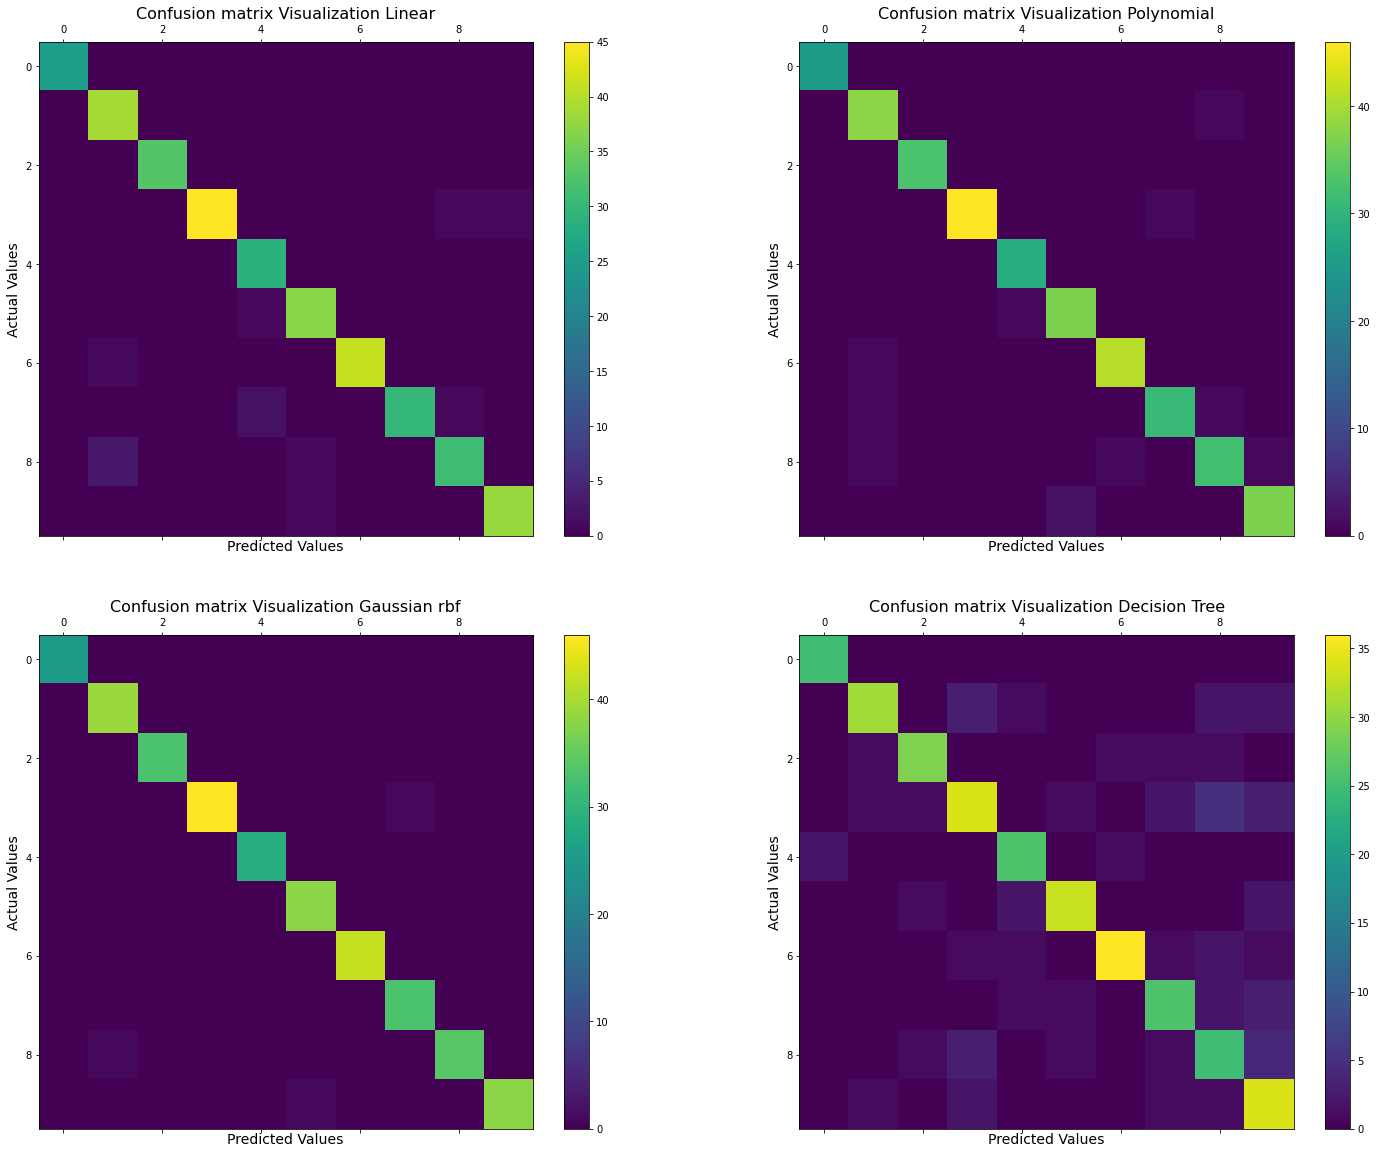

In [32]:
labels = list(digits.target_names)
labels = map(str,labels)
labels = list(labels)

cm = [cml,cmp,cmg,cms]
kname = ['Linear','Polynomial','Gaussian rbf','Decision Tree']


fig = plt.figure(figsize=(25,20))

for i in range(0,4):
    axes = fig.add_subplot(2,2,i+1)
    mv = axes.matshow(cm[i])
    axes.set_title('Confusion matrix Visualization '+kname[i],size='16')
    fig.colorbar(mv)
    #axes.set_xticklabels([''] + labels,size='12')
    #axes.set_yticklabels([''] + labels,size='12')
    axes.set_xlabel('Predicted Values',size='14')
    axes.set_ylabel('Actual Values',size='14')

# 
# Classification Report

In [33]:
crl = classification_report(Y_test,Y_predict_linear,target_names=labels)
crp = classification_report(Y_test,Y_predict_poly,target_names=labels)
crg = classification_report(Y_test,Y_predict_rbf,target_names=labels)
crs = classification_report(Y_test,Y_predict_dtree,target_names=labels)

print("\n\nClassification Report of Linear Kernel: \n\n",crl)
print("\n\nClassification Report of Polynomial Kernel: \n\n",crp)
print("\n\nClassification Report of Gaussian rbf Kernel: \n\n",crg)
print("\n\nClassification Report of Decision Tree Algorithm: \n\n",crs)



Classification Report of Linear Kernel: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.91      1.00      0.95        39
           2       1.00      1.00      1.00        33
           3       1.00      0.96      0.98        47
           4       0.91      1.00      0.95        29
           5       0.95      0.97      0.96        38
           6       1.00      0.98      0.99        42
           7       1.00      0.91      0.95        33
           8       0.94      0.89      0.91        35
           9       0.97      0.97      0.97        39

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



Classification Report of Polynomial Kernel: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.93      0.97     

### Gaussian rbf and Linear kernel have almost same recall and F1 score
### Guassian has highest accuracy
### 

# Plot decision tree

In [34]:
#pip install pydotplus
#conda install python-graphviz

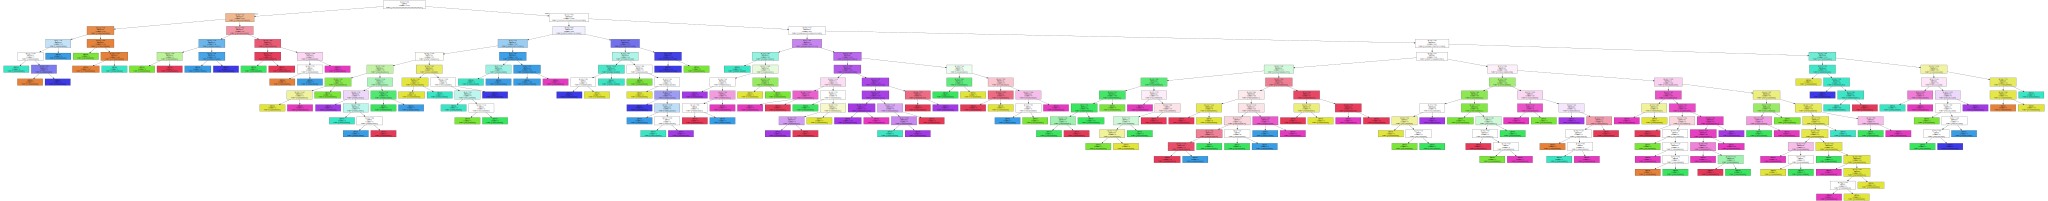

In [35]:
import graphviz
from sklearn.tree import export_graphviz
import pydotplus


dot_data = tree.export_graphviz(dtree, out_file=None,filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# Prediction Time with random data

### Using random, find a random index row from our original dataset

In [36]:
import random 
random.seed(7889)

# Gives a random number between 0 and total length of the dataset
random_num = random.randint(0,len(df))

# Selects a random column with random number we found above
trail = df.drop('target', axis=1).iloc[random_num]
trail

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     6.0
pixel_0_3    16.0
pixel_0_4    16.0
             ... 
pixel_7_3    13.0
pixel_7_4     1.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 263, Length: 64, dtype: float64

In [37]:
print(X_test.shape)
print(trail.shape)

(360, 64)
(64,)


In [38]:
trail = trail.values.reshape(1,-1)
trail.shape

(1, 64)

### We have our random data ready

In [39]:
trail

array([[ 0.,  0.,  6., 16., 16., 16., 16., 10.,  0.,  0.,  6., 10.,  8.,
        14., 16.,  3.,  0.,  0.,  0.,  0.,  4., 16.,  8.,  0.,  0.,  0.,
         2., 10., 14., 15.,  6.,  0.,  0.,  0.,  6., 16., 16., 16.,  7.,
         0.,  0.,  0.,  0., 15.,  9.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         6.,  0.,  0.,  0.,  0.,  0., 10., 13.,  1.,  0.,  0.,  0.]])

## Predict and Compare with actual output value

,Type,Value
0,Actual value,7.0
1,Linear,7.0
2,Polynomial,7.0
3,Gaussian rbf,7.0
4,Sigmoid,7.0


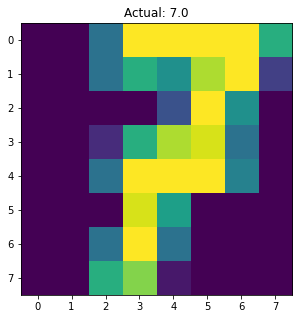

In [40]:
pred = pd.DataFrame({'Type': ['Actual value', 'Linear', 'Polynomial','Gaussian rbf','Sigmoid'],
                         'Value': [df.iloc[random_num]['target'], 
                                   svc_linear.predict(trail)[0],
                                   svc_poly.predict(trail)[0],
                                   svc_rbf.predict(trail)[0],
                                   dtree.predict(trail)[0]
                                  ]})

fig,axes = plt.subplots(1,1,figsize=(10,5))
axes.imshow(trail.reshape(8,8))
axes.set_title("Actual: "+str(df.iloc[random_num]['target']))


pred

## Thus, we can say that all SVC kernels and decision tree performed very well...
## But, focusing on the higher accuracy and least error... Gaussian kernel with SVC is our choice...